In [7]:
from shapely.geometry import Polygon

# Example coordinates for a Polygon
polygon_coords = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]

# Creating a Shapely Polygon
polygon = Polygon(polygon_coords)

# Displaying the Polygon
print("Example Polygon:")
print(polygon)


Example Polygon:
POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))


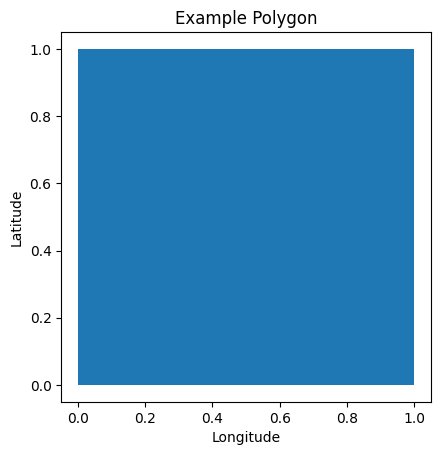

In [19]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Example coordinates for a Polygon
polygon_coords = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]

# Create a GeoDataFrame with the Polygon
gdf = gpd.GeoDataFrame(geometry=[Polygon(polygon_coords)])

# Plot the Polygon
gdf.plot()
plt.title("Example Polygon")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [8]:
from shapely.geometry import Polygon, MultiPolygon

# Example coordinates for two Polygons forming a MultiPolygon
polygon_coords1 = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
polygon_coords2 = [(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)]

# Creating Shapely Polygons
polygon1 = Polygon(polygon_coords1)
polygon2 = Polygon(polygon_coords2)

# Creating a Shapely MultiPolygon
multi_polygon = MultiPolygon([polygon1, polygon2])

# Displaying the MultiPolygon
print("\nExample MultiPolygon:")
print(multi_polygon)



Example MultiPolygon:
MULTIPOLYGON (((0 0, 0 1, 1 1, 1 0, 0 0)), ((1 1, 1 2, 2 2, 2 1, 1 1)))


In [9]:
# Example coordinate for a point
coordinate = (0.5, 0.5)

# Displaying the Coordinate
print("\nExample Coordinate:")
print(coordinate)



Example Coordinate:
(0.5, 0.5)


Properties & Methods


In [10]:
# Calculate area and perimeter of the Polygon
area = polygon.area
perimeter = polygon.length

print("Polygon Area:", area)
print("Polygon Perimeter:", perimeter)


Polygon Area: 1.0
Polygon Perimeter: 4.0


In [11]:
# Calculate centroid and exterior coordinates of the Polygon
centroid = polygon.centroid
exterior_coords = list(polygon.exterior.coords)

print("Polygon Centroid:", centroid)
print("Exterior Coordinates:", exterior_coords)


Polygon Centroid: POINT (0.5 0.5)
Exterior Coordinates: [(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]


In [12]:
# Accessing individual Polygons in MultiPolygon
individual_polygons = multi_polygon.geoms

for i, poly in enumerate(individual_polygons):
    print(f"Polygon {i + 1}:", poly)


Polygon 1: POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))
Polygon 2: POLYGON ((1 1, 1 2, 2 2, 2 1, 1 1))


In [13]:
# Calculate total area and perimeter of the MultiPolygon
total_area = multi_polygon.area
total_perimeter = multi_polygon.length

print("Total Area of MultiPolygon:", total_area)
print("Total Perimeter of MultiPolygon:", total_perimeter)


Total Area of MultiPolygon: 2.0
Total Perimeter of MultiPolygon: 8.0


In [14]:
from shapely.geometry import Point

# Create two Point objects
point1 = Point(0, 0)
point2 = Point(1, 1)

# Calculate distance between points
distance = point1.distance(point2)

print("Distance between Points:", distance)


Distance between Points: 1.4142135623730951


In [15]:
# Buffer a Point to create a Polygon
buffered_polygon = point1.buffer(0.5)

print("Buffered Polygon:", buffered_polygon)


Buffered Polygon: POLYGON ((0.5 0, 0.4975923633360985 -0.0490085701647803, 0.4903926402016152 -0.0975451610080641, 0.4784701678661044 -0.1451423386272312, 0.4619397662556434 -0.1913417161825449, 0.4409606321741775 -0.2356983684129988, 0.4157348061512726 -0.2777851165098011, 0.3865052266813685 -0.3171966420818227, 0.3535533905932738 -0.3535533905932738, 0.3171966420818227 -0.3865052266813684, 0.2777851165098011 -0.4157348061512726, 0.2356983684129989 -0.4409606321741775, 0.1913417161825449 -0.4619397662556434, 0.1451423386272312 -0.4784701678661045, 0.0975451610080642 -0.4903926402016152, 0.0490085701647804 -0.4975923633360984, 0 -0.5, -0.0490085701647803 -0.4975923633360985, -0.0975451610080641 -0.4903926402016152, -0.1451423386272311 -0.4784701678661045, -0.1913417161825449 -0.4619397662556434, -0.2356983684129988 -0.4409606321741775, -0.277785116509801 -0.4157348061512727, -0.3171966420818227 -0.3865052266813686, -0.3535533905932737 -0.3535533905932738, -0.3865052266813685 -0.3171966

In [16]:
# Validate if a Polygon is valid
is_valid = polygon.is_valid

print("Is Polygon Valid:", is_valid)


Is Polygon Valid: True


In [17]:
# Example of Union, Intersection, and Difference operations
union_result = polygon1.union(polygon2)
intersection_result = polygon1.intersection(polygon2)
difference_result = polygon1.difference(polygon2)

print("Union Result:", union_result)
print("Intersection Result:", intersection_result)
print("Difference Result:", difference_result)


Union Result: MULTIPOLYGON (((0 1, 1 1, 1 0, 0 0, 0 1)), ((1 2, 2 2, 2 1, 1 1, 1 2)))
Intersection Result: POINT (1 1)
Difference Result: POLYGON ((0 1, 1 1, 1 0, 0 0, 0 1))


In [20]:
from pymongo import MongoClient

class MongoDBConnector:
    def __init__(self, database_name, collection_name, host='localhost', port=27017):
        self.client = MongoClient(host, port)
        self.db = self.client[database_name]
        self.collection = self.db[collection_name]

    def connect_to_local_mongodb(self):
        print("Connected to local MongoDB")
        return self.client, self.collection

    def insert_geojson_data(self, geojson_file_path, chunk_size=1000):
        try:
            with open(geojson_file_path, 'r') as file:
                geojson_data = json.load(file)

            # Assuming GeoJSON is a list of features directly
            features = geojson_data.get('features', [])
            
            for i in range(0, len(features), chunk_size):
                chunk = features[i:i + chunk_size]
                self.collection.insert_many(chunk)
                print(f"Inserted {len(chunk)} features into local MongoDB collection '{self.collection.name}'.")
        
        except Exception as e:
            print(f"Error inserting data into MongoDB: {e}")

    def get_first_postal_code_multipolygon(self):
        try:
            # Retrieve the first document in the collection
            document = self.collection.find_one()

            # Extract postal code and multipolygon geometry
            postal_code = document.get('properties', {}).get('postal_code')
            multipolygon_geometry = document.get('geometry', {}).get('coordinates')

            return postal_code, multipolygon_geometry

        except Exception as e:
            print(f"Error retrieving data from MongoDB: {e}")
            return None, None

    def close_connection(self):
        try:
            self.client.close()
            print("Closed MongoDB connection.")
        except Exception as e:
            print(f"Error closing MongoDB connection: {e}")

# Example usage of the class
if __name__ == "__main__":
    # User input for the database and collection names
    database_name = "ZIP_Poly_DB_GeoJson"
    collection_name = "ZIP_Poly_Collection_GeoJson"

    # Create an instance of MongoDBConnector
    mongo_connector = MongoDBConnector(database_name, collection_name)

    # Connect to MongoDB
    mongo_client, mongo_collection = mongo_connector.connect_to_local_mongodb()

    # Example GeoJSON file path
    geojson_file_path = 'Germany_postal_codes.geojson'  # Update the file path accordingly

    # Insert GeoJSON data into MongoDB
    mongo_connector.insert_geojson_data(geojson_file_path, chunk_size=1000)

    # Get data for the first postal code multipolygon
    postal_code, multipolygon_geometry = mongo_connector.get_first_postal_code_multipolygon()

    # Print the results
    if postal_code and multipolygon_geometry:
        print(f"Postal Code: {postal_code}")
        print(f"Multipolygon Geometry: {multipolygon_geometry}")

    # Close MongoDB connection when done
    mongo_connector.close_connection()


Connected to local MongoDB
Error inserting data into MongoDB: [Errno 2] No such file or directory: 'Germany_postal_codes.geojson'
Postal Code: 53881
Multipolygon Geometry: [[[6.7111172, 50.6454982], [6.712389, 50.6464998], [6.7126781, 50.6484382], [6.7129073, 50.6499789], [6.712954, 50.6501239], [6.7130362, 50.650252], [6.7132178, 50.6504566], [6.7133549, 50.6505714], [6.7135049, 50.6506517], [6.7135755, 50.6507039], [6.7136681, 50.6507764], [6.7137643, 50.6508572], [6.7138811, 50.6509556], [6.7139981, 50.6510562], [6.7144126, 50.6514879], [6.7145204, 50.6516008], [6.7146967, 50.6517842], [6.7147516, 50.651843], [6.7147626, 50.6518596], [6.7151577, 50.6524721], [6.7152597, 50.6526322], [6.7163642, 50.652436], [6.7168723, 50.6523242], [6.7183532, 50.652092], [6.7192428, 50.6519872], [6.7205543, 50.6518692], [6.7218297, 50.6518049], [6.7217391, 50.6518564], [6.72174, 50.6518674], [6.7217406, 50.6518746], [6.7217434, 50.6519104], [6.7217464, 50.6519443], [6.7217472, 50.6519537], [6.721747

In [21]:
multipolygon_geometry

[[[6.7111172, 50.6454982],
  [6.712389, 50.6464998],
  [6.7126781, 50.6484382],
  [6.7129073, 50.6499789],
  [6.712954, 50.6501239],
  [6.7130362, 50.650252],
  [6.7132178, 50.6504566],
  [6.7133549, 50.6505714],
  [6.7135049, 50.6506517],
  [6.7135755, 50.6507039],
  [6.7136681, 50.6507764],
  [6.7137643, 50.6508572],
  [6.7138811, 50.6509556],
  [6.7139981, 50.6510562],
  [6.7144126, 50.6514879],
  [6.7145204, 50.6516008],
  [6.7146967, 50.6517842],
  [6.7147516, 50.651843],
  [6.7147626, 50.6518596],
  [6.7151577, 50.6524721],
  [6.7152597, 50.6526322],
  [6.7163642, 50.652436],
  [6.7168723, 50.6523242],
  [6.7183532, 50.652092],
  [6.7192428, 50.6519872],
  [6.7205543, 50.6518692],
  [6.7218297, 50.6518049],
  [6.7217391, 50.6518564],
  [6.72174, 50.6518674],
  [6.7217406, 50.6518746],
  [6.7217434, 50.6519104],
  [6.7217464, 50.6519443],
  [6.7217472, 50.6519537],
  [6.7217479, 50.6519618],
  [6.7218176, 50.652007],
  [6.721828, 50.6520544],
  [6.7219182, 50.6524679],
  [6.721995